In [1]:
!python --version

Python 3.10.12


In [2]:
!nvidia-smi

Sun Jul 28 23:36:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.40                 Driver Version: 536.40       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0  On |                  Off |
|  0%   51C    P8              28W / 450W |   1509MiB / 24564MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
#!pip install -q supervision

In [4]:
#!pip install github

In [5]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\nurma\JupyterNotebooks


In [6]:
import ultralytics
from ultralytics import YOLO

In [7]:
model = YOLO('yolov10b.pt')

In [27]:
model = YOLO('yolov9c-seg.pt')

100%|█████████████████████████████████████████████████████████████████████████████| 53.9M/53.9M [00:03<00:00, 18.6MB/s]


In [8]:
#!pip install ultralytics --upgrade

In [21]:
results = model(source=f'{HOME}/imgs/cityimg.jpg', conf=0.25)


image 1/1 C:\Users\nurma\JupyterNotebooks\imgs\cityimg.jpg: 448x640 11 persons, 11 cars, 3 traffic lights, 1 handbag, 79.6ms
Speed: 1.5ms preprocess, 79.6ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


In [22]:
results[0].show()

In [23]:
import cv2
import supervision as sv


0: 448x640 11 persons, 11 cars, 3 traffic lights, 1 handbag, 173.7ms
Speed: 2.5ms preprocess, 173.7ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


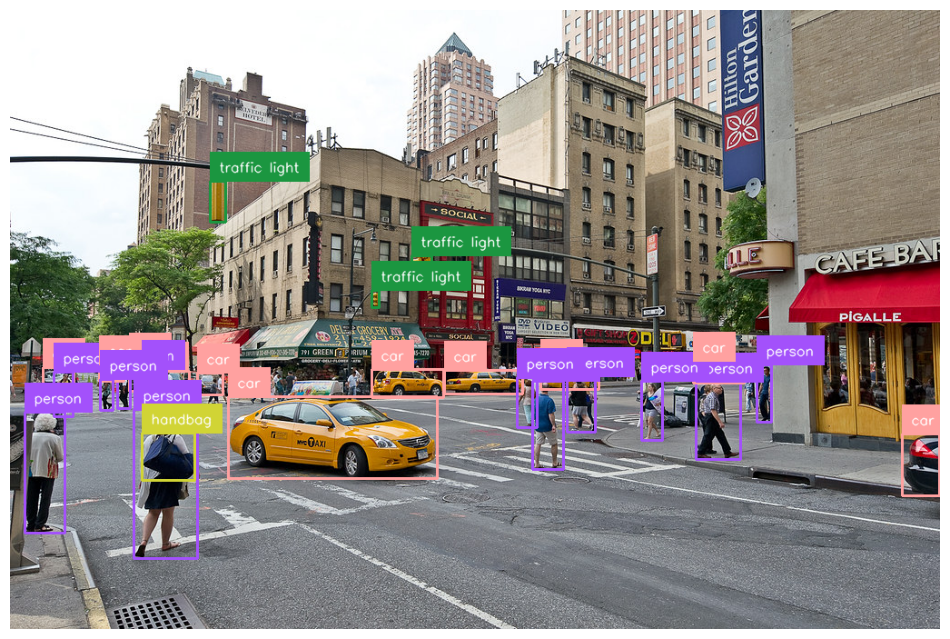

In [24]:
img = cv2.imread(f'{HOME}/imgs/cityimg.jpg')
results = model(img)[0]
detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(scene=img, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [63]:
#!pip install roboflow --upgrade

In [71]:
#!pip install -U roboflow

In [15]:
#!pip list

Package                   Version
------------------------- --------------------
aiohttp                   3.8.1
aiosignal                 1.3.1
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.3
bleach                    4.1.0
Brotli                    1.0.9
certifi                   2024.7.4
cffi                      1.16.0
chardet                   4.0.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.16.2
filelock                  3.15.4
fonttools  

In [12]:
from roboflow import Roboflow
rf = Roboflow(api_key="p9NBqhOPWOR77cJi7yd4")
project = rf.workspace("collab-t7ire").project("pen-pencil-and-paper")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`


Extracting Dataset Version Zip to pen/pencil-and-paper-3 in yolov8:: 100%|███████| 9806/9806 [00:02<00:00, 4290.42it/s]


In [13]:

from roboflow import Roboflow
rf = Roboflow(api_key="p9NBqhOPWOR77cJi7yd4")
project = rf.workspace("collab-t7ire").project("ppp-b5nlj")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ppp-1 in yolov8:: 100%|██████████████████████| 17530/17530 [00:04<00:00, 4184.75it/s]


In [14]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Feb__8_05:53:42_Coordinated_Universal_Time_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0


In [15]:

#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [25]:
import torch
import torchvision
torch.cuda.is_available()

True

In [17]:
#!python -c "import torch; print(torch.version.cuda)"

In [18]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [19]:
#!conda install pytorch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 pytorch-cuda=12.1 -c pytorch -c nvidia

In [28]:
#model = YOLO('yolov10b.pt')
model = YOLO('yolov9c-seg.pt')
model.train(data=f'{HOME}/ppp-1/data.yaml', epochs=200, batch=-1, device=0, plots=True)

New https://pypi.org/project/ultralytics/8.2.68 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.55  Python-3.10.12 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=C:\Users\nurma\JupyterNotebooks/ppp-1/data.yaml, epochs=200, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

train: Scanning C:\Users\nurma\JupyterNotebooks\ppp-1\train\labels.cache... 7877 images, 3 backgrounds, 0 corrupt: 100%

train: WARNING  C:\Users\nurma\JupyterNotebooks\ppp-1\train\images\0023_jpg.rf.6d8e03f50fe58318ec12cfedbe2938a3.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\nurma\JupyterNotebooks\ppp-1\train\images\F_0000_jpg.rf.f58c9c98f56fd46053088749a966db25.jpg: 1 duplicate labels removed



val: Scanning C:\Users\nurma\JupyterNotebooks\ppp-1\valid\labels.cache... 553 images, 0 backgrounds, 0 corrupt: 100%|██


Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      16.5G     0.6647       2.06      1.106      1.166         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.945      0.552      0.613      0.542      0.929       0.54      0.592      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      13.4G     0.7071      1.592      0.806      1.173         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.733       0.42       0.41       0.34      0.695      0.386      0.366      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      13.5G     0.8623      1.866     0.9449       1.27         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.726      0.398      0.395      0.293      0.717       0.39      0.371      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      13.4G     0.9162      1.987      1.004      1.299         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.878      0.476      0.513      0.431      0.836      0.442      0.455      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      13.5G     0.8317      1.783     0.9006      1.244         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.907      0.545      0.583      0.489      0.891      0.513      0.546      0.409



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      13.5G     0.7776      1.663     0.8302      1.204         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.919      0.527      0.599      0.516      0.884      0.506      0.561      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      13.5G     0.7396      1.559     0.7729      1.178         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.93      0.557      0.652      0.544      0.916      0.538       0.62       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      13.3G     0.7109      1.484      0.734      1.165         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.924      0.545      0.625      0.547      0.921      0.521        0.6      0.478



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      13.5G     0.6784       1.36     0.6788      1.139         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.939      0.546      0.653      0.567       0.92      0.532      0.629      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      13.5G     0.6575       1.33     0.6624      1.126         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.918      0.562      0.629      0.539      0.908      0.547      0.596      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      13.4G     0.6466      1.307      0.639      1.116         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.929       0.56      0.635      0.561      0.946       0.53      0.612      0.488



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      13.3G      0.631      1.241     0.6235      1.112         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.949      0.573      0.669      0.591      0.933      0.557      0.643      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      13.5G     0.6111      1.227     0.6076      1.099         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.93      0.584      0.667      0.592      0.961      0.538      0.637      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      13.5G     0.6058      1.187      0.595      1.092         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.765      0.621      0.689      0.596       0.75      0.605      0.666      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      13.5G     0.5968      1.162     0.5785      1.081         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.646      0.641      0.683      0.599       0.63      0.621       0.66      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      13.3G      0.584      1.156      0.561      1.074         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.944      0.596      0.687      0.605      0.939      0.577      0.663      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      13.5G      0.572      1.103     0.5493      1.072         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.947      0.592      0.697      0.611      0.933      0.575      0.651      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      13.5G     0.5688      1.084     0.5471      1.068         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.712      0.659      0.711      0.616      0.696       0.64      0.689      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      13.4G     0.5545      1.073     0.5312      1.063         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.657      0.661      0.719      0.626      0.672      0.609      0.693      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      13.3G     0.5464      1.056     0.5196      1.054         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.951      0.599        0.7       0.62      0.941      0.582      0.673      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      13.5G     0.5448      1.031     0.5179      1.055         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.709      0.635      0.693       0.61      0.703      0.621      0.672      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      13.4G     0.5488      1.031     0.5167      1.055         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.966      0.591      0.681      0.608      0.959      0.578      0.664      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      13.4G     0.5308      1.008     0.4969      1.047         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.702      0.603      0.702      0.624      0.693      0.592      0.685      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      13.3G     0.5311      1.007     0.4947      1.045         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.636      0.782      0.736      0.645      0.621      0.766      0.719      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      13.5G     0.5191     0.9751     0.4798      1.037         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.96      0.593      0.687      0.613      0.958      0.572      0.666      0.548



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      13.4G     0.5234     0.9931     0.4907      1.044         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.72      0.654        0.7      0.627      0.702      0.636      0.676      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      13.4G     0.5101     0.9659      0.476      1.033         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.629      0.674      0.701      0.632      0.611      0.649      0.672      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      13.3G     0.5161     0.9735     0.4754      1.032         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.684       0.69      0.735      0.652      0.669      0.673      0.717      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      13.5G     0.5039     0.9289     0.4623      1.025         23        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.718      0.665      0.705      0.624      0.714      0.661      0.696      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      13.5G     0.5075     0.9279     0.4647      1.026         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.657      0.678      0.704      0.621      0.633      0.661      0.684      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      13.5G     0.5005     0.9474      0.455      1.027         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.697      0.647      0.715       0.63      0.682       0.63      0.697      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      13.3G     0.4881     0.9013     0.4461      1.019          9        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.723      0.667       0.71      0.636      0.711      0.656      0.695      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      13.5G      0.498     0.9055     0.4555      1.022         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.633      0.662       0.68      0.613      0.619      0.643      0.659      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      13.4G      0.491     0.9126      0.451      1.022         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.738      0.644      0.724      0.641      0.731      0.637      0.706      0.583



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      13.4G     0.4844     0.8834      0.441      1.016         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.63      0.749      0.703      0.631      0.607       0.73      0.682      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      13.3G     0.4893     0.8974     0.4361      1.018         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.63      0.676      0.707      0.637      0.621      0.664      0.693      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      13.5G     0.4796     0.8847     0.4356      1.014         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.709      0.675      0.709      0.635      0.688      0.654      0.686      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      13.4G     0.4757     0.8647     0.4318       1.01         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.704      0.704       0.73      0.645      0.691       0.69      0.713       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      13.4G     0.4813     0.9017     0.4319      1.013         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.606      0.747      0.714      0.638      0.599      0.738      0.704      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      13.3G     0.4662     0.8644     0.4181      1.005         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.624      0.678      0.713      0.638      0.615      0.664      0.694      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      13.5G     0.4676     0.8421     0.4176      1.004         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.642      0.721      0.727      0.648      0.631      0.706      0.708      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      13.4G     0.4729     0.8693     0.4154      1.007         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.664      0.717       0.72      0.649      0.653      0.704      0.705      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      13.4G     0.4711     0.8673     0.4243      1.007         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.726      0.681      0.745      0.662      0.713      0.666      0.724      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      13.3G     0.4666     0.8594     0.4163      1.003         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.658      0.713      0.727      0.653      0.648      0.699      0.709      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      13.5G     0.4663     0.8452     0.4132      1.002         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.67      0.734      0.731       0.65       0.66       0.72      0.714      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      13.4G     0.4624     0.8447     0.4121     0.9996         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.756      0.724      0.769      0.667       0.74      0.707       0.75      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      13.4G     0.4521     0.8047      0.404      0.991         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.659      0.739      0.734      0.664      0.641       0.72      0.715      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      13.3G     0.4529     0.8118     0.3995     0.9964         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.608      0.721      0.734       0.66      0.599      0.709      0.718      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      13.4G     0.4529     0.8033     0.3967     0.9967         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.751        0.7      0.745      0.663      0.741      0.688      0.732      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      13.5G     0.4531     0.8086     0.3963     0.9945         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.783      0.702      0.756      0.677       0.77      0.686      0.737      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      13.5G     0.4482     0.8016     0.3917     0.9934         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.718      0.712      0.743      0.665      0.705      0.697      0.726      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      13.3G     0.4476     0.8064     0.3916     0.9897         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.693      0.674      0.702       0.64      0.683      0.663      0.688      0.575



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      13.5G     0.4396     0.7911     0.3825     0.9896         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.75      0.671      0.714      0.651      0.751      0.664      0.705      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      13.4G     0.4415     0.8013     0.3852     0.9898         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.709      0.671      0.721      0.647      0.697      0.658      0.705      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      13.4G     0.4457     0.8014     0.3857     0.9929         31        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.781      0.667      0.724      0.655      0.769      0.656      0.709      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      13.3G     0.4444     0.7799     0.3848     0.9942         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810        0.8      0.689      0.728      0.651       0.79      0.679      0.713      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      13.5G     0.4372     0.7682     0.3778     0.9879         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.698      0.722      0.749      0.668      0.684      0.709      0.732      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      13.4G     0.4361      0.786     0.3724     0.9853         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.716      0.656      0.717      0.652      0.708      0.647      0.703      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      13.4G     0.4396     0.7842     0.3802     0.9869         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.784      0.673      0.738      0.663      0.776      0.664      0.725      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      13.3G     0.4336     0.7688     0.3753     0.9823         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.654      0.711      0.725      0.659      0.646      0.701      0.712      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      13.5G     0.4297     0.7529     0.3671     0.9794         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.659      0.689      0.723      0.655      0.651      0.678       0.71      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200      13.5G     0.4292     0.7679     0.3674     0.9815         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.64      0.665       0.71      0.648      0.624      0.647      0.693       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      13.5G     0.4353     0.7629      0.376     0.9859         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.723      0.655      0.724      0.655      0.706      0.638      0.701      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      13.3G      0.425     0.7522     0.3677     0.9809         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.668      0.684      0.728      0.653      0.781      0.637      0.714        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      13.5G     0.4252     0.7423     0.3695     0.9809         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.659      0.711      0.723      0.658      0.651      0.701      0.713      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      13.4G     0.4191     0.7491     0.3662     0.9803          9        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.661      0.716      0.746       0.67      0.681      0.681      0.735      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      13.4G     0.4246     0.7629     0.3656       0.98         10        640: 100%|██████████| 493/493 [6:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.653       0.71      0.729      0.661      0.643      0.696      0.715      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      13.3G      0.421     0.7319     0.3584     0.9755         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.782      0.684      0.741      0.669       0.77      0.671      0.726      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      13.5G     0.4126     0.7151     0.3493     0.9744         28        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.696      0.705      0.721      0.654      0.689      0.697       0.71      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      13.5G     0.4189     0.7483     0.3538     0.9763         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.732      0.689      0.738      0.669       0.72      0.677      0.725      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      13.4G     0.4186     0.7467     0.3543     0.9791         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.699      0.707      0.723       0.66      0.692      0.699      0.714      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      13.3G     0.4148      0.722     0.3509     0.9707         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.784      0.695      0.729      0.663      0.776      0.687      0.721      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      13.5G     0.4203     0.7459     0.3579     0.9767         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.757        0.7      0.729      0.664      0.745       0.69      0.719      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      13.4G     0.4169     0.7274     0.3538      0.975         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.725      0.705      0.735       0.67      0.716      0.695      0.721      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      13.5G     0.4054     0.7022     0.3439     0.9718          9        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.78      0.706      0.746       0.68      0.769      0.699      0.736      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      13.3G     0.4125     0.7293     0.3521     0.9726         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.708      0.702      0.722      0.661      0.701      0.695      0.714       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      13.5G     0.4099     0.7158     0.3499     0.9694         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.724        0.7      0.727      0.665      0.718      0.692      0.718      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200      13.5G     0.4097     0.7144     0.3462     0.9724         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.708      0.704      0.726      0.661      0.701      0.695      0.717      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      13.5G     0.4063     0.7047      0.344     0.9686         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.743      0.681      0.739      0.673      0.738      0.675      0.731      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      13.3G      0.406     0.6976     0.3426     0.9655          8        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.745      0.682      0.737      0.671      0.737      0.673      0.725      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      13.5G     0.4045     0.7019     0.3384     0.9678         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.677      0.757      0.748      0.681      0.668      0.746      0.736      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      13.5G     0.4004     0.6948     0.3414     0.9669         32        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.663      0.737      0.748      0.675      0.658       0.73      0.739      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      13.4G     0.4005     0.6988     0.3392     0.9637         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.686      0.735      0.741      0.668      0.675      0.719      0.736      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      13.3G     0.3984     0.6979     0.3375     0.9634         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.708       0.68      0.734      0.668      0.704      0.676      0.727       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      13.5G     0.3977     0.7034      0.333     0.9619         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.684      0.729      0.726      0.664      0.677      0.721      0.716       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      13.5G     0.3966     0.6839     0.3306     0.9632         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.684       0.73       0.72      0.658      0.676      0.721      0.709      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      13.4G     0.3985     0.6941     0.3298     0.9641         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.752      0.682      0.742      0.669      0.743      0.673      0.732      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      13.4G     0.3994     0.7031     0.3334     0.9616         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.75      0.677      0.738      0.668      0.747       0.67      0.727      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      13.5G     0.3992     0.6895     0.3325     0.9624         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.735      0.676      0.742      0.672      0.721      0.671      0.732      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      13.4G     0.3924     0.6768     0.3284     0.9579         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.75      0.678      0.752      0.683      0.755      0.672      0.743      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200      13.4G     0.3879     0.6637     0.3221     0.9558         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.757      0.678      0.742      0.675      0.754      0.672      0.733      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      13.3G     0.3935     0.6752     0.3295     0.9629         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.758      0.677      0.734      0.672      0.754      0.671      0.726      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      13.5G     0.3942     0.6869     0.3283     0.9635          8        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.752      0.677      0.741      0.679      0.748      0.672      0.732      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      13.5G     0.3945     0.6766     0.3252     0.9619         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.74      0.679      0.745      0.685      0.733      0.671      0.737      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      13.4G     0.3853     0.6736     0.3256     0.9607         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.732      0.686      0.747      0.683      0.725      0.679      0.738       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200      13.3G     0.3848      0.665     0.3209     0.9589         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.751      0.684      0.749      0.688      0.745      0.677      0.741      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      13.5G     0.3922     0.6799     0.3266     0.9568         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810        0.7      0.735      0.748      0.687      0.694      0.728      0.741      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      13.4G     0.3807     0.6506     0.3145     0.9559         25        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.746      0.683      0.743      0.685      0.741      0.678      0.736      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      13.4G      0.382     0.6485     0.3142     0.9543         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.739      0.683      0.747      0.688      0.731      0.675      0.739      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      13.3G     0.3805     0.6519     0.3155     0.9526         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.737      0.685      0.747      0.687       0.73      0.678      0.738      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200      13.4G     0.3893     0.6776     0.3193     0.9566         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.696      0.734      0.755      0.691      0.692      0.727      0.746      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      13.5G     0.3827      0.651     0.3138     0.9567         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.697      0.735      0.743      0.684       0.69      0.726      0.735      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      13.4G     0.3802     0.6468     0.3115     0.9589         24        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.689      0.734      0.749      0.687       0.69      0.727       0.74      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200      13.3G     0.3803     0.6652     0.3098     0.9548         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.682      0.733      0.751      0.687      0.676      0.726      0.741      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      13.5G     0.3725     0.6401     0.3037     0.9513         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.676      0.711      0.747      0.686       0.74      0.679      0.738      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200      13.4G     0.3732     0.6457     0.3087     0.9516         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.752      0.685      0.747      0.685      0.745      0.678      0.738       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      13.4G     0.3734     0.6367     0.3069      0.949         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.747      0.685      0.749      0.685       0.74      0.677       0.74      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      13.3G     0.3739     0.6515      0.305     0.9503         27        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.754      0.684      0.752      0.687      0.749      0.677      0.743      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      13.4G     0.3735     0.6445     0.3068     0.9509         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.74      0.684      0.751      0.688      0.733      0.677      0.743      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      13.4G     0.3709     0.6449     0.3032     0.9479         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.745      0.684       0.75      0.684      0.737      0.676      0.741      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      13.5G     0.3677     0.6209     0.3027     0.9503          9        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.798      0.678      0.753      0.686      0.794      0.672      0.745      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      13.3G     0.3639     0.6269      0.297     0.9459         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.803      0.678      0.754      0.686      0.797      0.673      0.745      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      13.5G     0.3704     0.6248     0.2986     0.9502         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.812      0.678      0.755       0.69      0.805      0.673      0.747      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      13.5G     0.3683     0.6336     0.2968     0.9503         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.818      0.678      0.753      0.689      0.813      0.674      0.746      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      13.4G     0.3616     0.6073     0.2925     0.9468         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.836      0.677      0.759      0.692      0.834      0.675      0.752       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      13.3G     0.3645     0.6241     0.2928     0.9458         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.819      0.679      0.751      0.684      0.817      0.676      0.744      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200      13.5G     0.3652     0.6257     0.2909     0.9442         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.816      0.677      0.752      0.685      0.814      0.674      0.745      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      13.4G     0.3642     0.6208     0.2922     0.9432         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.822      0.676       0.75      0.683       0.82      0.674      0.745      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      13.4G     0.3627     0.6223     0.2927     0.9448         33        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.826      0.676       0.75      0.687      0.821      0.672      0.744      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      13.3G     0.3614     0.6219     0.2908     0.9442         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.832      0.675      0.743      0.679      0.828      0.672      0.735      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      13.5G     0.3572     0.6071     0.2879     0.9407         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.82      0.675      0.742      0.682      0.815      0.672      0.736      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      13.5G     0.3611     0.6252     0.2916     0.9436         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.801      0.674       0.74      0.677      0.794      0.672      0.734      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      13.4G     0.3554     0.6022     0.2867     0.9415         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.774      0.674      0.742      0.679      0.768      0.671      0.735      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      13.3G     0.3605      0.623     0.2859      0.941         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.754      0.675      0.735      0.676      0.751      0.671      0.727      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      13.5G     0.3607     0.6235     0.2882     0.9429         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.758      0.674      0.732      0.673      0.755      0.671      0.725      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      13.5G     0.3555     0.6012     0.2828       0.94         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.761      0.674      0.731      0.674      0.758      0.671      0.724      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      13.4G     0.3516      0.594     0.2813     0.9366         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.762      0.674      0.732      0.676      0.759      0.671      0.725      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      13.3G     0.3538     0.5957     0.2833     0.9398         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.763      0.674      0.732      0.676      0.761      0.672      0.726      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200      13.4G     0.3511     0.5997     0.2818     0.9393         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.768      0.674      0.734      0.677      0.766      0.671      0.728       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      13.4G     0.3551     0.6094     0.2802     0.9393         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.776      0.672      0.742      0.683      0.771      0.669      0.735      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      13.5G     0.3477     0.5806      0.275     0.9388         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.775      0.674      0.739      0.681      0.771      0.671      0.732      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      13.3G     0.3454     0.5759     0.2741     0.9366         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.776      0.674      0.738      0.681      0.771      0.669      0.731      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      13.5G     0.3487      0.597     0.2818     0.9408         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.776      0.674      0.739      0.681      0.772       0.67      0.732      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      13.5G     0.3441     0.6019     0.2719     0.9352         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.775      0.674      0.739      0.682      0.771       0.67      0.733      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      13.4G     0.3391     0.5887     0.2674     0.9321         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674      0.732      0.676      0.767       0.67      0.726       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      13.3G     0.3447     0.5811     0.2711     0.9335         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674      0.731      0.675      0.769      0.671      0.726       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      13.5G      0.338     0.5721     0.2664     0.9306          9        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.769      0.674      0.729      0.674      0.766      0.671      0.723      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      13.4G     0.3406     0.5796     0.2679     0.9308         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.769      0.675      0.728      0.674      0.766      0.671      0.722      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      13.4G     0.3325     0.5583     0.2628     0.9314         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.768      0.675      0.731      0.676      0.765      0.671      0.725       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      13.3G     0.3415     0.5876     0.2673     0.9355         13        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.768      0.674      0.731      0.675      0.765      0.671      0.725      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      13.5G     0.3355     0.5709     0.2629     0.9303         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674       0.73      0.674      0.768      0.671      0.725      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      13.4G     0.3398      0.588     0.2631     0.9286         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.77      0.674      0.729      0.673      0.767      0.671      0.724      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      13.4G     0.3334     0.5621     0.2637     0.9262         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.675      0.728      0.672      0.767      0.671      0.723      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      13.3G     0.3345     0.5699     0.2601     0.9277         25        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.675      0.726      0.672      0.767      0.671      0.721      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      13.5G      0.334     0.5657     0.2624     0.9271         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674      0.728      0.672      0.768      0.671      0.722      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      13.5G     0.3278     0.5528     0.2581     0.9247         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.77      0.674      0.726      0.671      0.767      0.671      0.721      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      13.4G      0.339     0.5847     0.2641     0.9329         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.77      0.675      0.726      0.671      0.767      0.671      0.721      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      13.3G     0.3253     0.5461      0.254     0.9281         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.769      0.675      0.726      0.671      0.766      0.672       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      13.4G     0.3275     0.5488     0.2544     0.9263         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.77      0.675      0.728      0.671      0.766      0.671      0.721      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      13.4G     0.3274     0.5666     0.2556     0.9309         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.77      0.675      0.728      0.671      0.766      0.672      0.722      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      13.4G     0.3228     0.5512      0.249     0.9257         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.769      0.675      0.727      0.671      0.766      0.671      0.722      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      13.3G      0.319     0.5455     0.2485     0.9235         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.675      0.726      0.671      0.767      0.671       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      13.5G      0.324     0.5396     0.2462     0.9242         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.772      0.674      0.726       0.67      0.768      0.671       0.72      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      13.5G     0.3219     0.5462     0.2504     0.9237         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674      0.727      0.672      0.768      0.671       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      13.4G      0.325     0.5359     0.2485     0.9253         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.674      0.727      0.672      0.768      0.671       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      13.3G     0.3212     0.5448     0.2468     0.9245         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.673      0.726      0.672      0.768      0.671       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      13.4G     0.3213     0.5394     0.2448     0.9224         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.771      0.673      0.725      0.671      0.769       0.67      0.718      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      13.5G     0.3222     0.5511     0.2465     0.9257         23        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.772      0.674      0.725       0.67      0.769      0.671      0.719      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      13.4G      0.317      0.542     0.2469     0.9226         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.772      0.674      0.728      0.674      0.769      0.671      0.722      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      13.3G     0.3128     0.5236     0.2403     0.9202         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.773      0.673      0.728      0.672      0.769       0.67      0.722      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      13.4G     0.3181     0.5479     0.2427       0.92         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.773      0.673      0.727      0.671       0.77       0.67       0.72      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      13.5G     0.3155     0.5438     0.2416     0.9216         33        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.773      0.674      0.728      0.672       0.77       0.67      0.722      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      13.5G     0.3101     0.5322     0.2373     0.9187         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.774      0.673       0.73      0.674      0.771      0.671      0.724       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      13.3G     0.3134     0.5272     0.2411     0.9203         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.774      0.672      0.728      0.676      0.771       0.67      0.723      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      13.5G     0.3104      0.516     0.2408     0.9196         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.774      0.672      0.728      0.676      0.772       0.67      0.722      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      13.5G     0.3116     0.5235     0.2364     0.9181         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.775      0.672      0.729      0.675      0.772       0.67      0.722      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      13.5G     0.3067     0.5235     0.2335     0.9179         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.775      0.672      0.728      0.673      0.773       0.67      0.722      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      13.3G      0.308     0.5222      0.232     0.9169         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.775      0.672      0.726       0.67      0.773       0.67       0.72      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      13.5G     0.3068     0.5219     0.2334     0.9196         16        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.776      0.673      0.725       0.67      0.774      0.671      0.719      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      13.4G     0.2994     0.5111     0.2258     0.9151         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.776      0.672      0.725      0.673      0.774       0.67       0.72      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      13.5G     0.3031     0.5105     0.2286     0.9122         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.777      0.671      0.724      0.672      0.774       0.67      0.718      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      13.3G     0.3034     0.5204     0.2294     0.9136         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.777      0.671      0.723      0.672      0.774      0.669      0.718      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      13.5G     0.3026     0.5162     0.2251     0.9137         18        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.778      0.671      0.723      0.672      0.775      0.669      0.718      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    174/200      13.4G     0.3006     0.5049     0.2257     0.9141         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.778      0.671      0.723      0.671      0.775      0.669      0.717      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    175/200      13.4G     0.2983     0.5081     0.2297     0.9147         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.778      0.671      0.721      0.671      0.775      0.669      0.716      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    176/200      13.4G     0.2968     0.4949     0.2242     0.9126         20        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.778      0.671      0.722      0.671      0.776      0.669      0.717      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    177/200      13.5G     0.2948     0.4981     0.2219     0.9123         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.781      0.672       0.72      0.669      0.777      0.669      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    178/200      13.4G      0.301     0.5183     0.2265     0.9156         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.782      0.672      0.719      0.669      0.779      0.669      0.714      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    179/200      13.4G     0.2932     0.4885       0.22     0.9133         15        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.782      0.671      0.719      0.669      0.779      0.669      0.714      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    180/200      13.3G     0.2904     0.4905     0.2161     0.9119         19        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.784      0.671      0.721      0.669      0.781      0.668      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    181/200      13.5G     0.2914     0.4902     0.2168     0.9126         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.786      0.671      0.721      0.669      0.783      0.668      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    182/200      13.5G     0.2959     0.5045     0.2231      0.912         27        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.788       0.67      0.721      0.669      0.786      0.667      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    183/200      13.4G     0.2872     0.4855     0.2151     0.9104         14        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.789      0.669      0.721      0.669      0.787      0.668      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    184/200      13.3G     0.2843     0.4791     0.2127     0.9093         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810       0.79      0.669       0.72      0.669      0.789      0.667      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    185/200      13.5G     0.2894     0.4916     0.2139     0.9092         17        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.792       0.67       0.72      0.669       0.79      0.668      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    186/200      13.4G     0.2881     0.4897     0.2162     0.9086         12        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.793       0.67       0.72      0.669      0.791      0.668      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    187/200      13.4G     0.2842     0.4744     0.2107     0.9078         21        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.794       0.67      0.719      0.668      0.792      0.668      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    188/200      13.3G     0.2827     0.4852     0.2123     0.9054         11        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.795       0.67      0.719      0.669      0.793      0.668      0.715      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    189/200      13.5G     0.2863     0.4961     0.2135     0.9101         22        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.795       0.67       0.72      0.669      0.793      0.668      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    190/200      13.5G     0.2846     0.4738     0.2104     0.9079          8        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.796       0.67       0.72      0.669      0.794      0.668      0.715      0.623


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    191/200      13.4G     0.1994     0.3944     0.1902     0.8542          7        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.796       0.67       0.72      0.669      0.794      0.668      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    192/200      13.3G     0.1955     0.3865      0.183     0.8544          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.796       0.67       0.72      0.669      0.795      0.668      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    193/200      13.5G     0.1907     0.3784     0.1778     0.8498          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.797       0.67       0.72      0.669      0.795      0.669      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    194/200      13.4G     0.1894     0.3813     0.1772     0.8473          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.797       0.67      0.721      0.669      0.795      0.669      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    195/200      13.5G     0.1877     0.3738     0.1731     0.8446          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.798      0.669       0.72      0.669      0.796      0.668      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    196/200      13.3G     0.1888     0.3758     0.1747     0.8507          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.799      0.669       0.72      0.669      0.797      0.668      0.716      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    197/200      13.5G     0.1819     0.3674     0.1694     0.8468          6        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.799      0.669       0.72      0.669      0.797      0.668      0.715      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    198/200      13.5G     0.1825     0.3786     0.1699     0.8482          8        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.799       0.67      0.721      0.669      0.797      0.668      0.716      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    199/200      13.4G       0.18      0.366     0.1686     0.8465          5        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.799       0.67      0.716      0.666      0.797      0.668      0.711      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    200/200      13.3G     0.1831     0.3701      0.172     0.8499         10        640: 100%|██████████| 493/493 [01:
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        553        810      0.799       0.67      0.716      0.665      0.797      0.668      0.711      0.621



200 epochs completed in 13.046 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 56.3MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 56.3MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics YOLOv8.2.55  Python-3.10.12 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,626,841 parameters, 0 gradients, 157.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        553        810      0.837      0.677      0.759      0.692      0.835      0.675      0.752       0.65
                 paper        356        363      0.992      0.992      0.993      0.983      0.992      0.992      0.993      0.984
                   pen        187        432      0.923      0.907      0.946      0.845      0.916        0.9      0.925      0.703
            pen-pencil         11         15      0.596      0.133      0.338      0.249      0.596      0.133      0.338      0.262
Speed: 0.1ms preprocess, 3.1ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\segment\train2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000248012EEC50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    

In [21]:
#model = YOLO(f'{HOME}/runs/detect/train8/weights/best.pt')
model = YOLO('yolov10b.pt')
results = model(source=f'{HOME}/imgs/p2.jpg', conf=0.25)
results[0].show()


image 1/1 C:\Users\nurma\JupyterNotebooks\imgs\p2.jpg: 320x640 3 knifes, 1 book, 79.3ms
Speed: 3.6ms preprocess, 79.3ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


In [22]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p